import the main libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import os , joblib, missingno

load the dataset and make an overview  

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/agoor97/Regression_Project_Udemy/main/housing.csv",)

In [6]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#check some statistics 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
#check the nulls
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

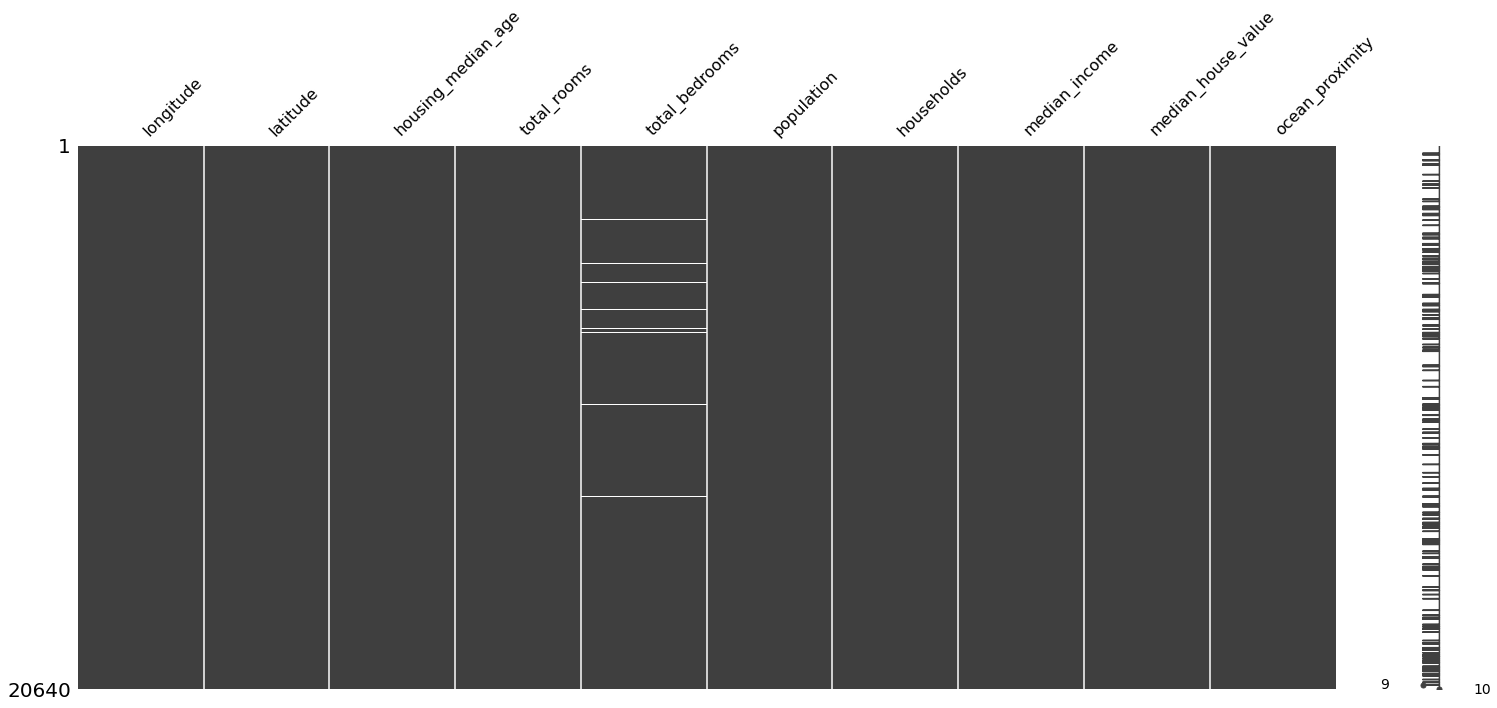

In [14]:
missingno.matrix(df)

* > 'our comment : we have 10 columns  and 20640 rows 
     the data is numerical expect ocean_proximity         
     we have only 207 null values in total_bedrooms '       

# ---------------------------------------------------------------------

# EDA


Univariate Visualization


### ocean_proximity

In [46]:
#check the values of ocean_proximity
ocean_values=  df["ocean_proximity"].value_counts()
ocean_values

1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
# Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
df["ocean_proximity"]=df["ocean_proximity"].replace("<1H OCEAN","1H OCEAN")

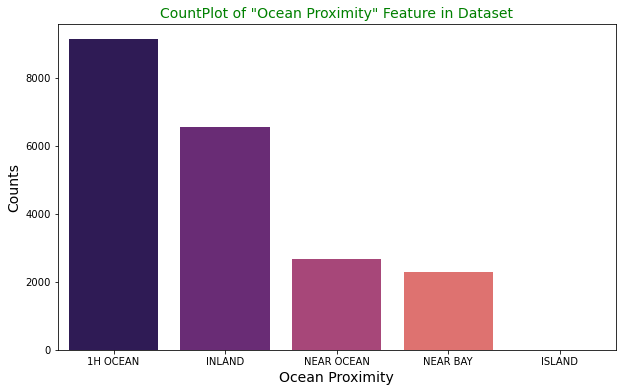

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df, order=ocean_values.index , palette='magma')
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='g')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c="k")
plt.show()

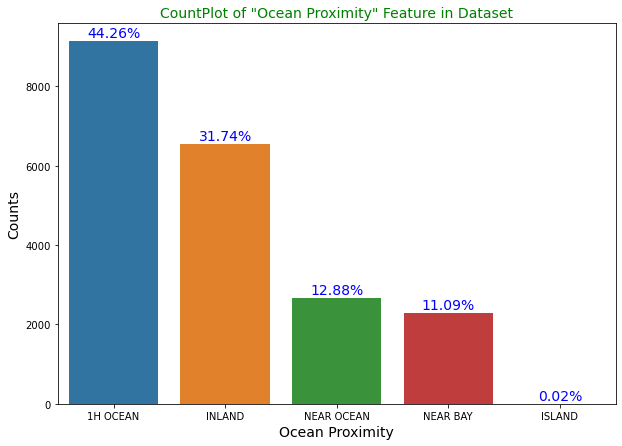

In [48]:
plt.figure(figsize=(10, 7))
sns.countplot(x='ocean_proximity', data=df, order = ocean_values.index )
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='g')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c="k")
#plt.show()
## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

In [49]:
#about 45% of our data is 1H OCEAN

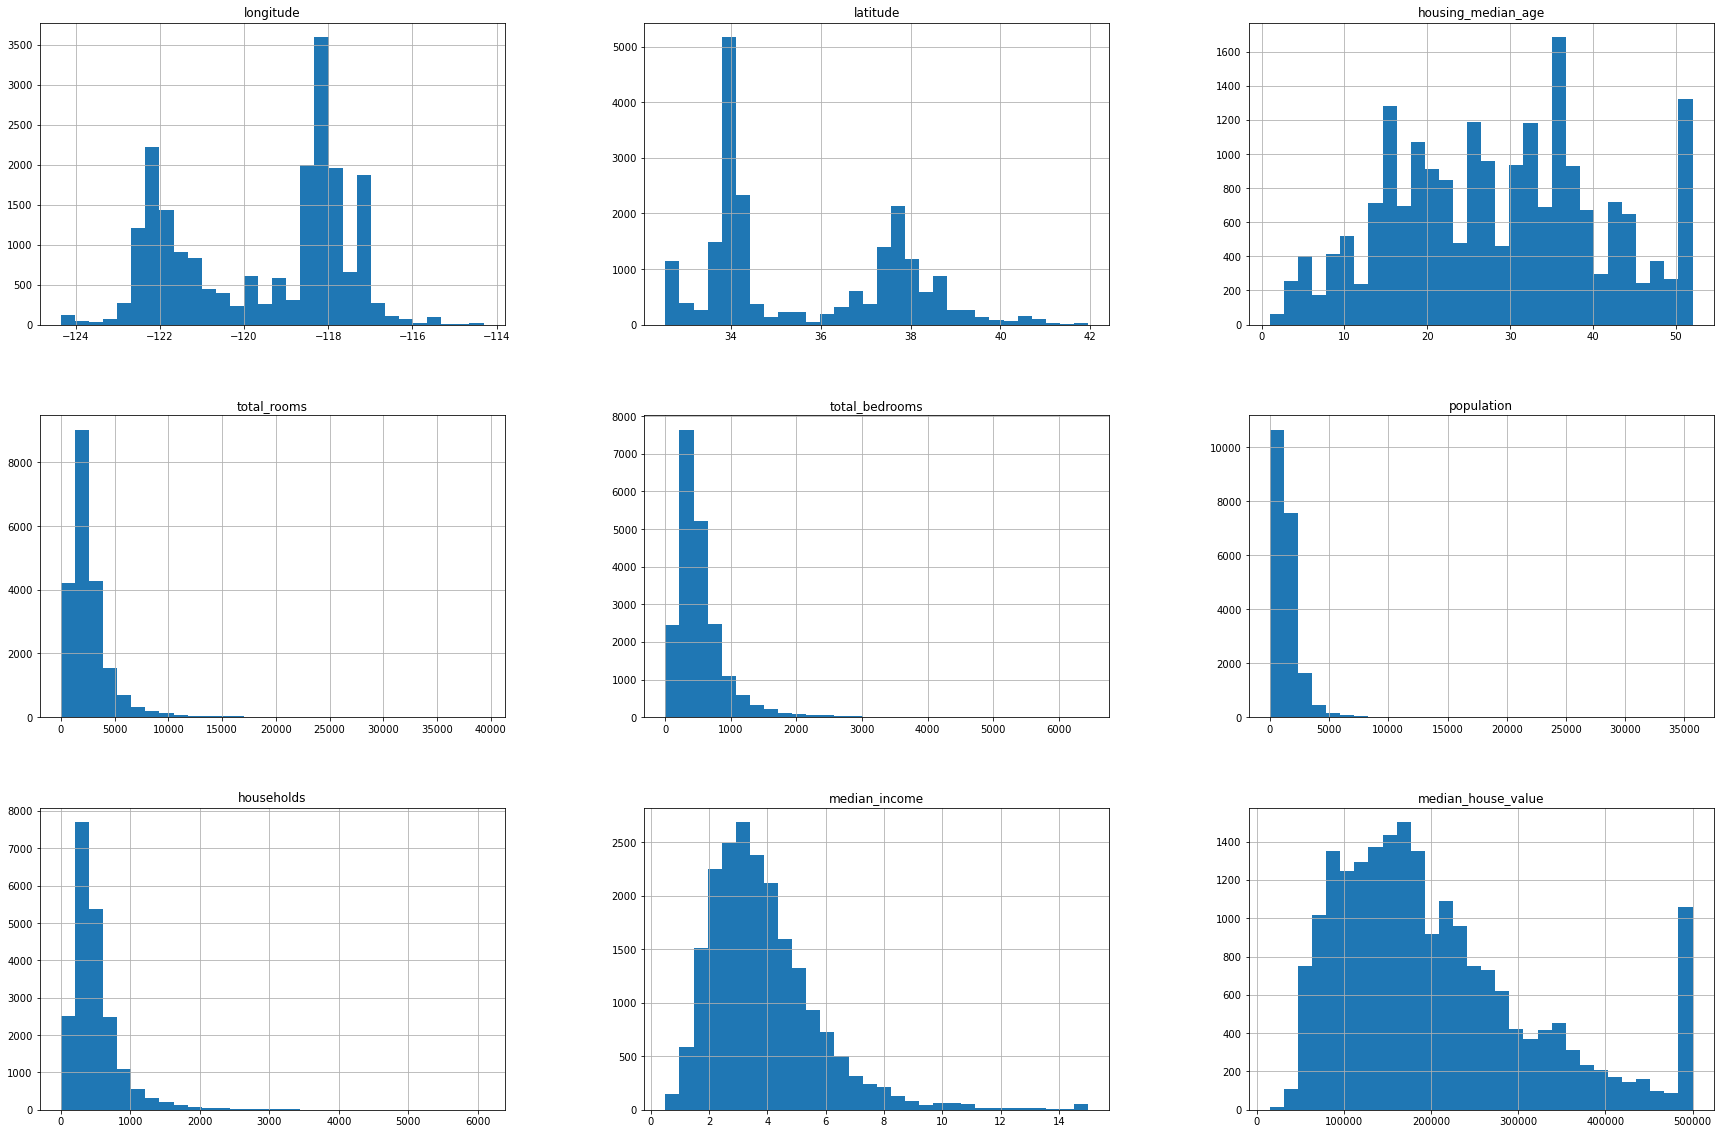

In [53]:
# Histogram Distr. of Numerical Features in Dataset
df.hist(bins=30, figsize=(30, 20))
plt.show()

In [54]:
# our data right squed expect median house value and house median age 

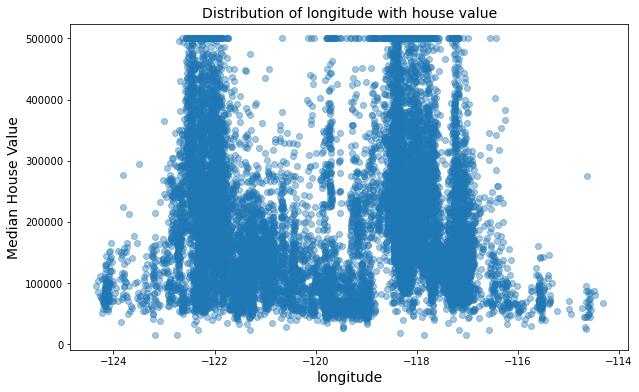

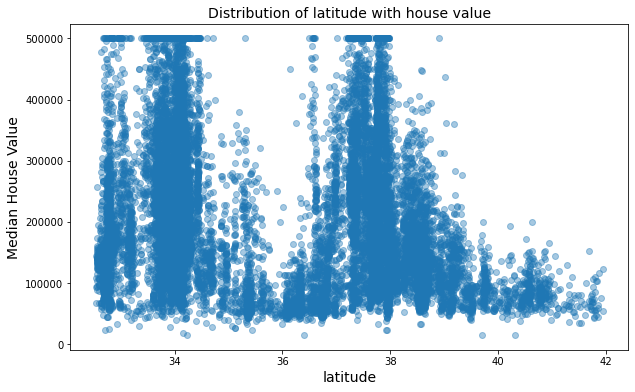

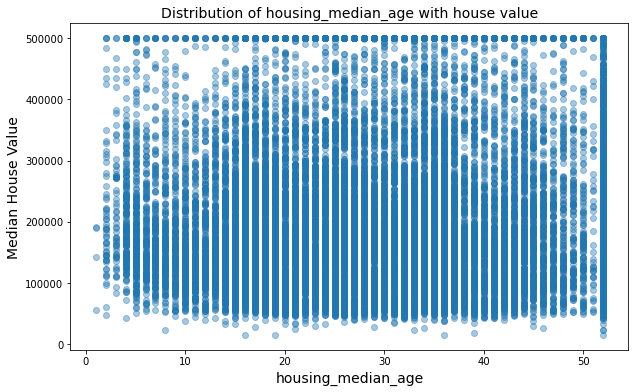

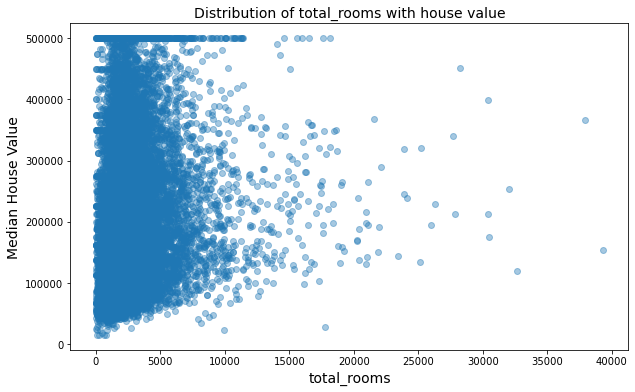

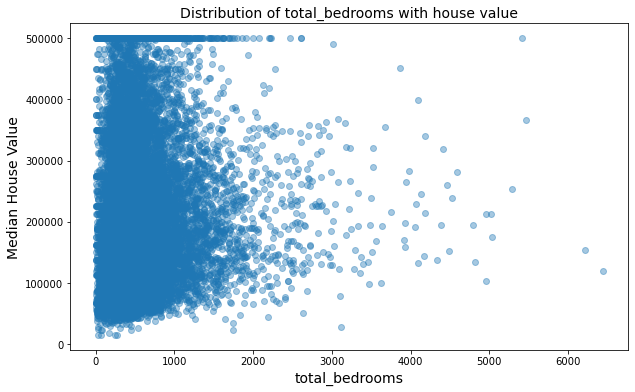

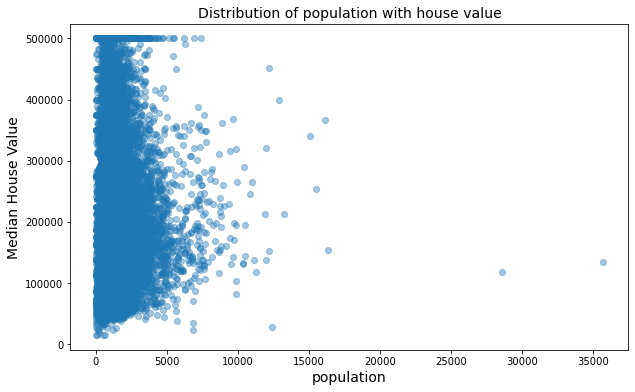

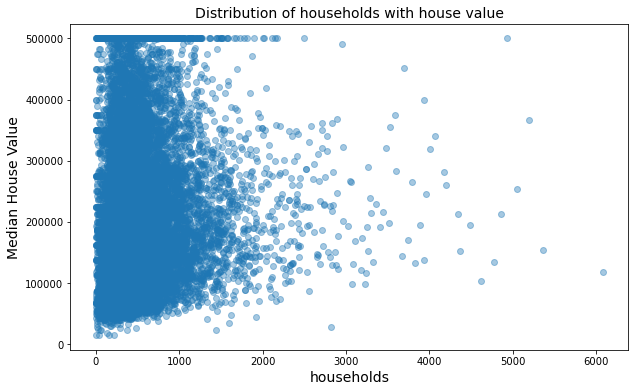

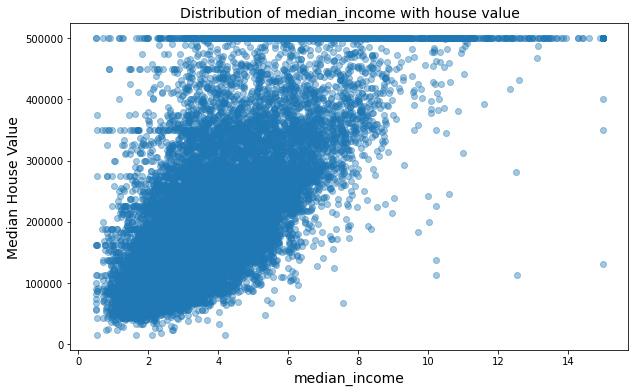

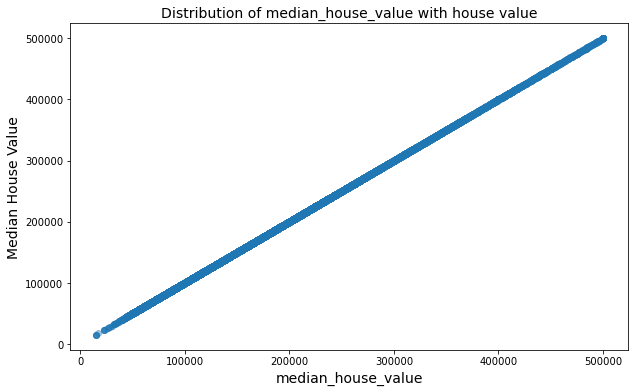

In [59]:
for i , coltype in df.dtypes.iteritems():
    if coltype != object:
        plt.figure(figsize=(10, 6))
        plt.scatter(df[i], df['median_house_value'], alpha=0.4)
        plt.title(f'Distribution of {i} with house value', fontsize=14, c='k')
        plt.xlabel(f'{i}', fontsize=14, c='k')
        plt.ylabel('Median House Value', fontsize=14, c='k')
        plt.show()
       

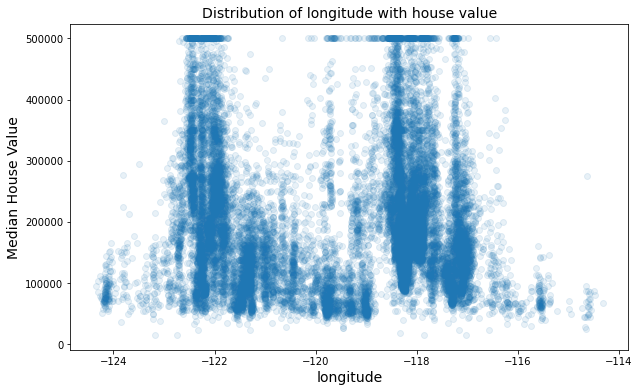

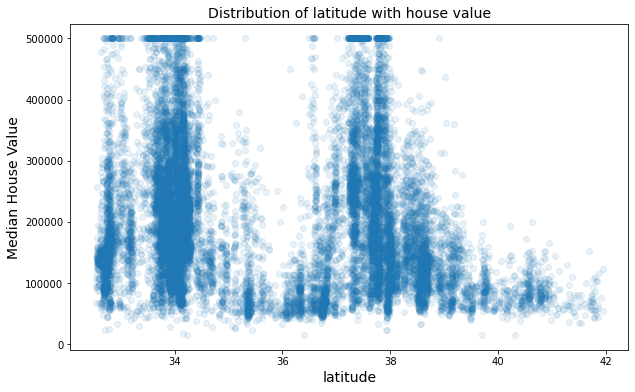

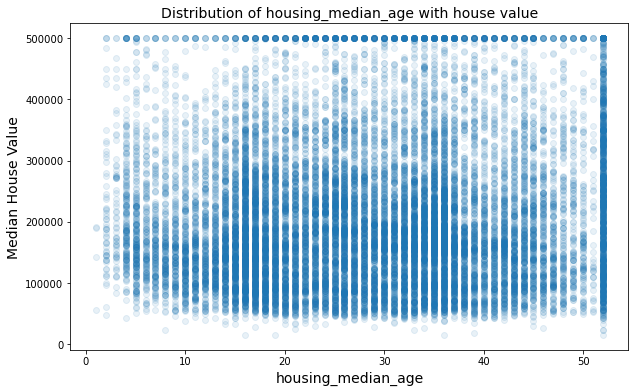

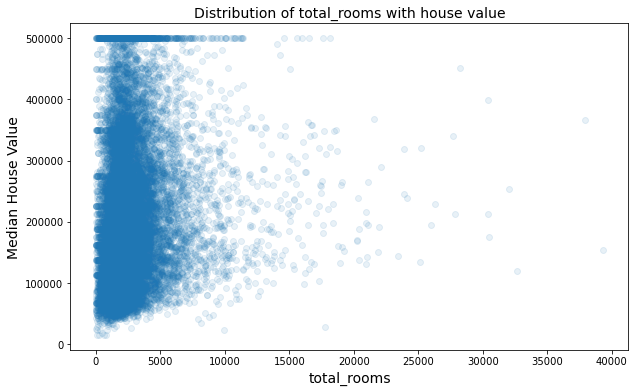

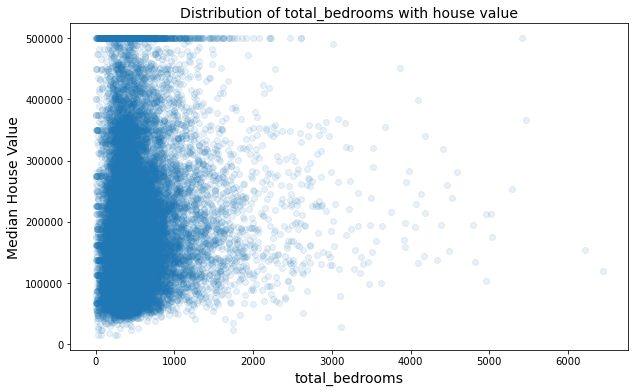

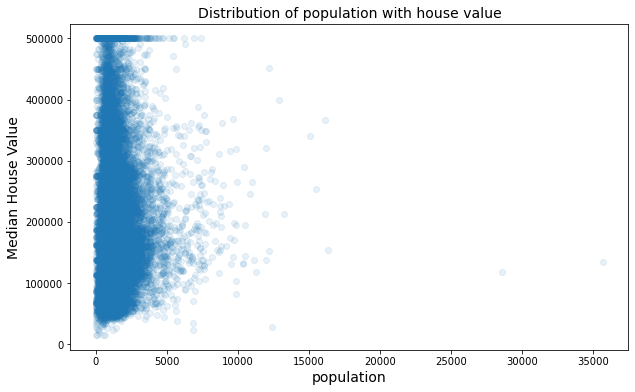

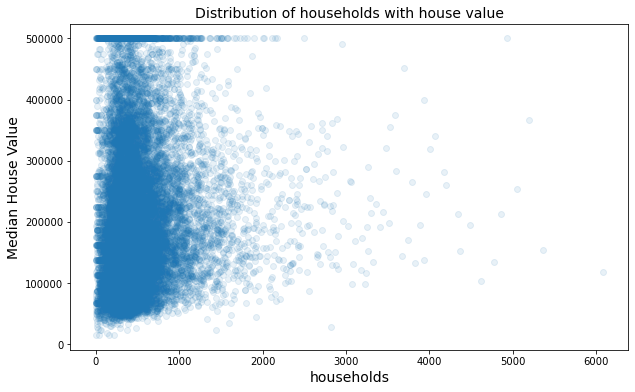

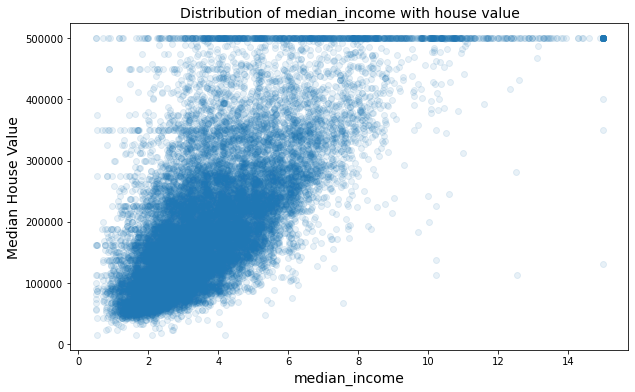

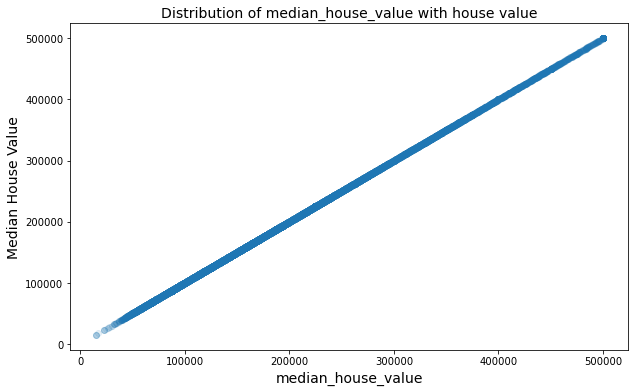

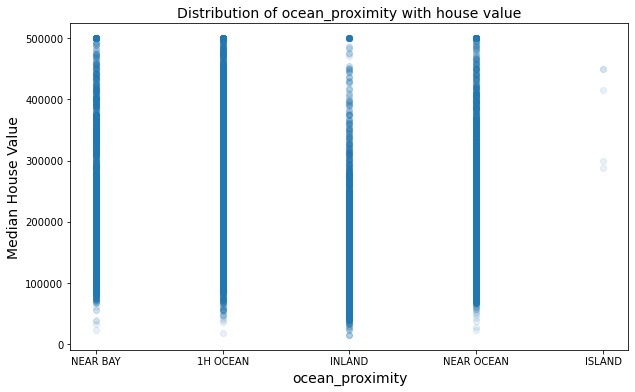

In [65]:
for i in df.columns:
    
        plt.figure(figsize=(10, 6))
        plt.scatter(df[i], df['median_house_value'], alpha=0.1)
        plt.title(f'Distribution of {i} with house value', fontsize=14, c='k')
        plt.xlabel(f'{i}', fontsize=14, c='k')
        plt.ylabel('Median House Value', fontsize=14, c='k')
        plt.show()

In [ ]:
#there is arelation between median income and house value

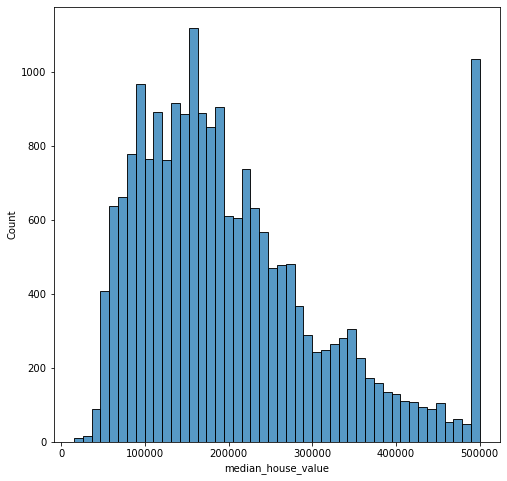

In [80]:
plt.figure(figsize=(8,8))

sns.histplot(data=df,x="median_house_value", multiple="dodge", palette='hsv_r');

In [67]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')